In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)

# Loading Data

## Train Data

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_train.drop(columns=['Unnamed: 0'],inplace=True)
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_train.set_index('id',drop=True,inplace=True)
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_train.shape

(103904, 23)

In [6]:
df_train.describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [7]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Test Data

In [8]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
df_test.drop(columns='Unnamed: 0',inplace=True)
df_test.set_index('id',drop=True,inplace=True)
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
df_test.shape

(25976, 23)

In [11]:
df_test.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

# Data Cleaning

## Train Data Cleaning

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1

In [13]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [14]:
df_train['Arrival Delay in Minutes']

id
70172     18.0
5047       6.0
110028     0.0
24026      9.0
119299     0.0
          ... 
94171      0.0
73097      0.0
68825     14.0
54173      0.0
62567      0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [15]:
df_train['Arrival Delay in Minutes'].mean()

15.178678301832152

In [16]:
#df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean(),inplace=True)

In [17]:
df_train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [18]:
def replace_delay(row):
    if row['satisfaction'] == 'satisfied':
        return 0 if pd.isnull(row['Arrival Delay in Minutes']) else row['Arrival Delay in Minutes']
    else:
        return df_train['Arrival Delay in Minutes'].mean() if pd.isnull(row['Arrival Delay in Minutes']) else row['Arrival Delay in Minutes']

# Застосування функції до DataFrame
df_train['Arrival Delay in Minutes'] = df_train.apply(replace_delay, axis=1)

In [19]:
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [20]:
df_train['Arrival Delay in Minutes'].mean()
## mean value to zero values in this column Arrival Delay in Minutes were replaced by zeros 
##If the customer was satisfied and the mean value If the customer was neutral or dissatisfied

15.159979591266326

In [21]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Test Data Cleaning 

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 19556 to 34799
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null 

In [23]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [24]:
df_test['Arrival Delay in Minutes'].mean()

14.74085660217047

In [25]:
df_test['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [26]:
def replace_delay(row):
    if row['satisfaction'] == 'satisfied':
        return 0 if pd.isnull(row['Arrival Delay in Minutes']) else row['Arrival Delay in Minutes']
    else:
        return df_test['Arrival Delay in Minutes'].mean() if pd.isnull(row['Arrival Delay in Minutes']) else row['Arrival Delay in Minutes']

# Застосування функції до DataFrame
df_test['Arrival Delay in Minutes'] = df_test.apply(replace_delay, axis=1)
df_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [27]:
df_test['Arrival Delay in Minutes'].mean()

14.719292367843297

In [28]:
df_test.head(8)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied
79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.0,satisfied
97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.0,satisfied


# Charts

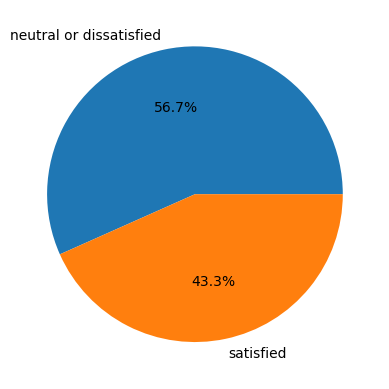

In [29]:
plt.pie(df_train['satisfaction'].value_counts(),labels=['neutral or dissatisfied','satisfied'],autopct='%1.1f%%')
plt.show()

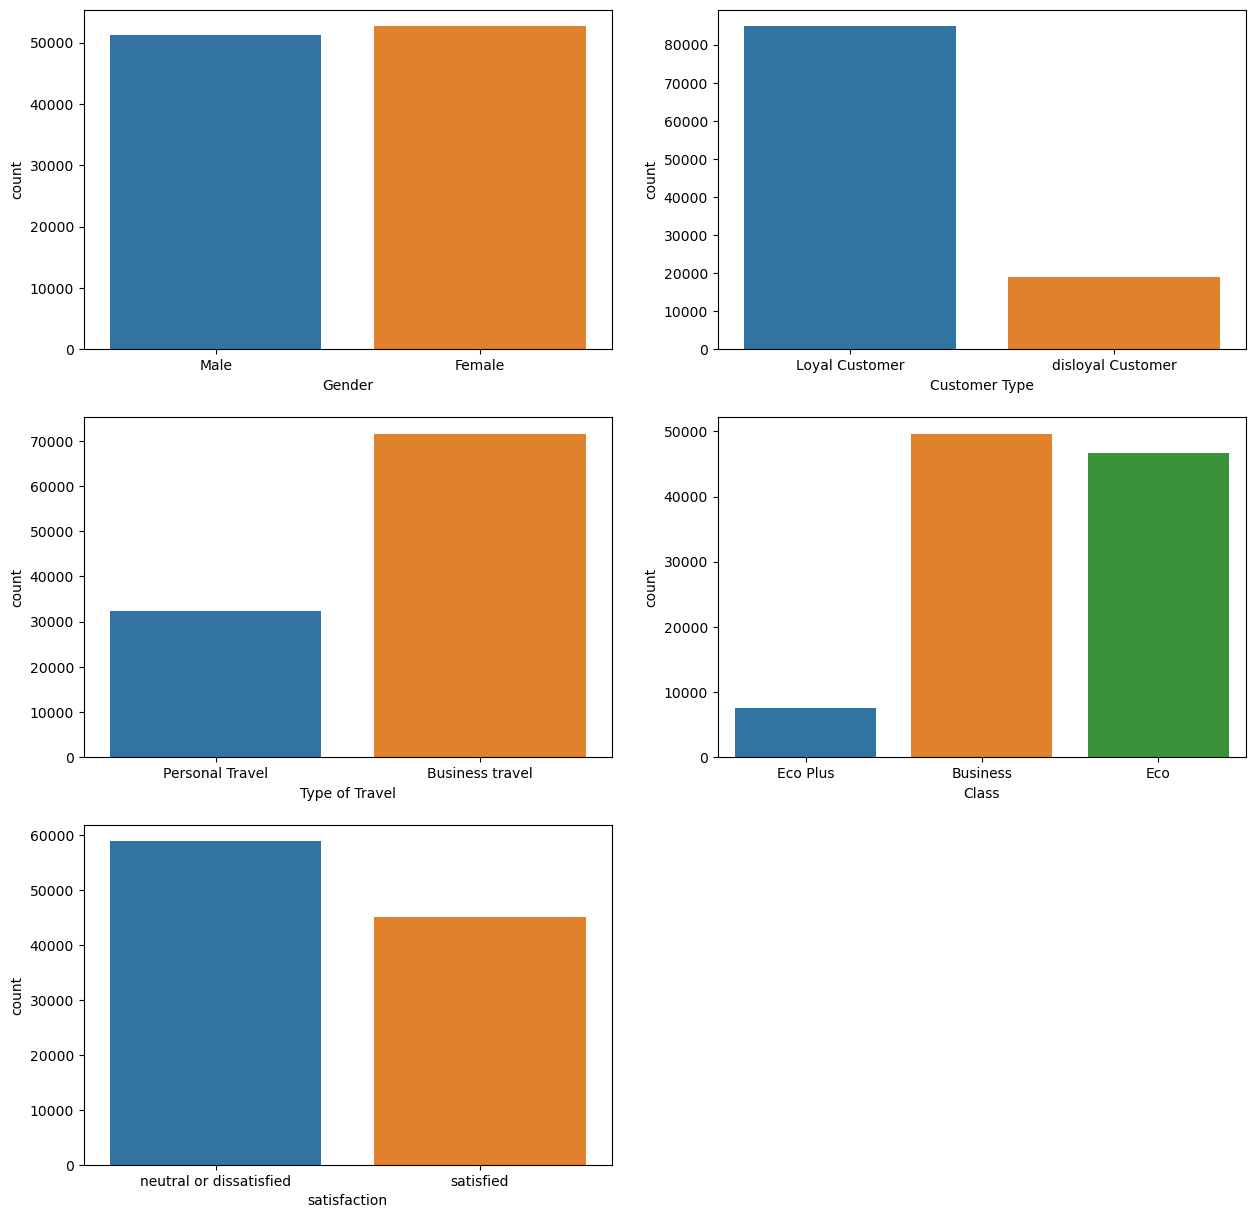

In [30]:
cols=['Gender','Customer Type','Type of Travel','Class','satisfaction']
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col,data=df_train)
plt.show()

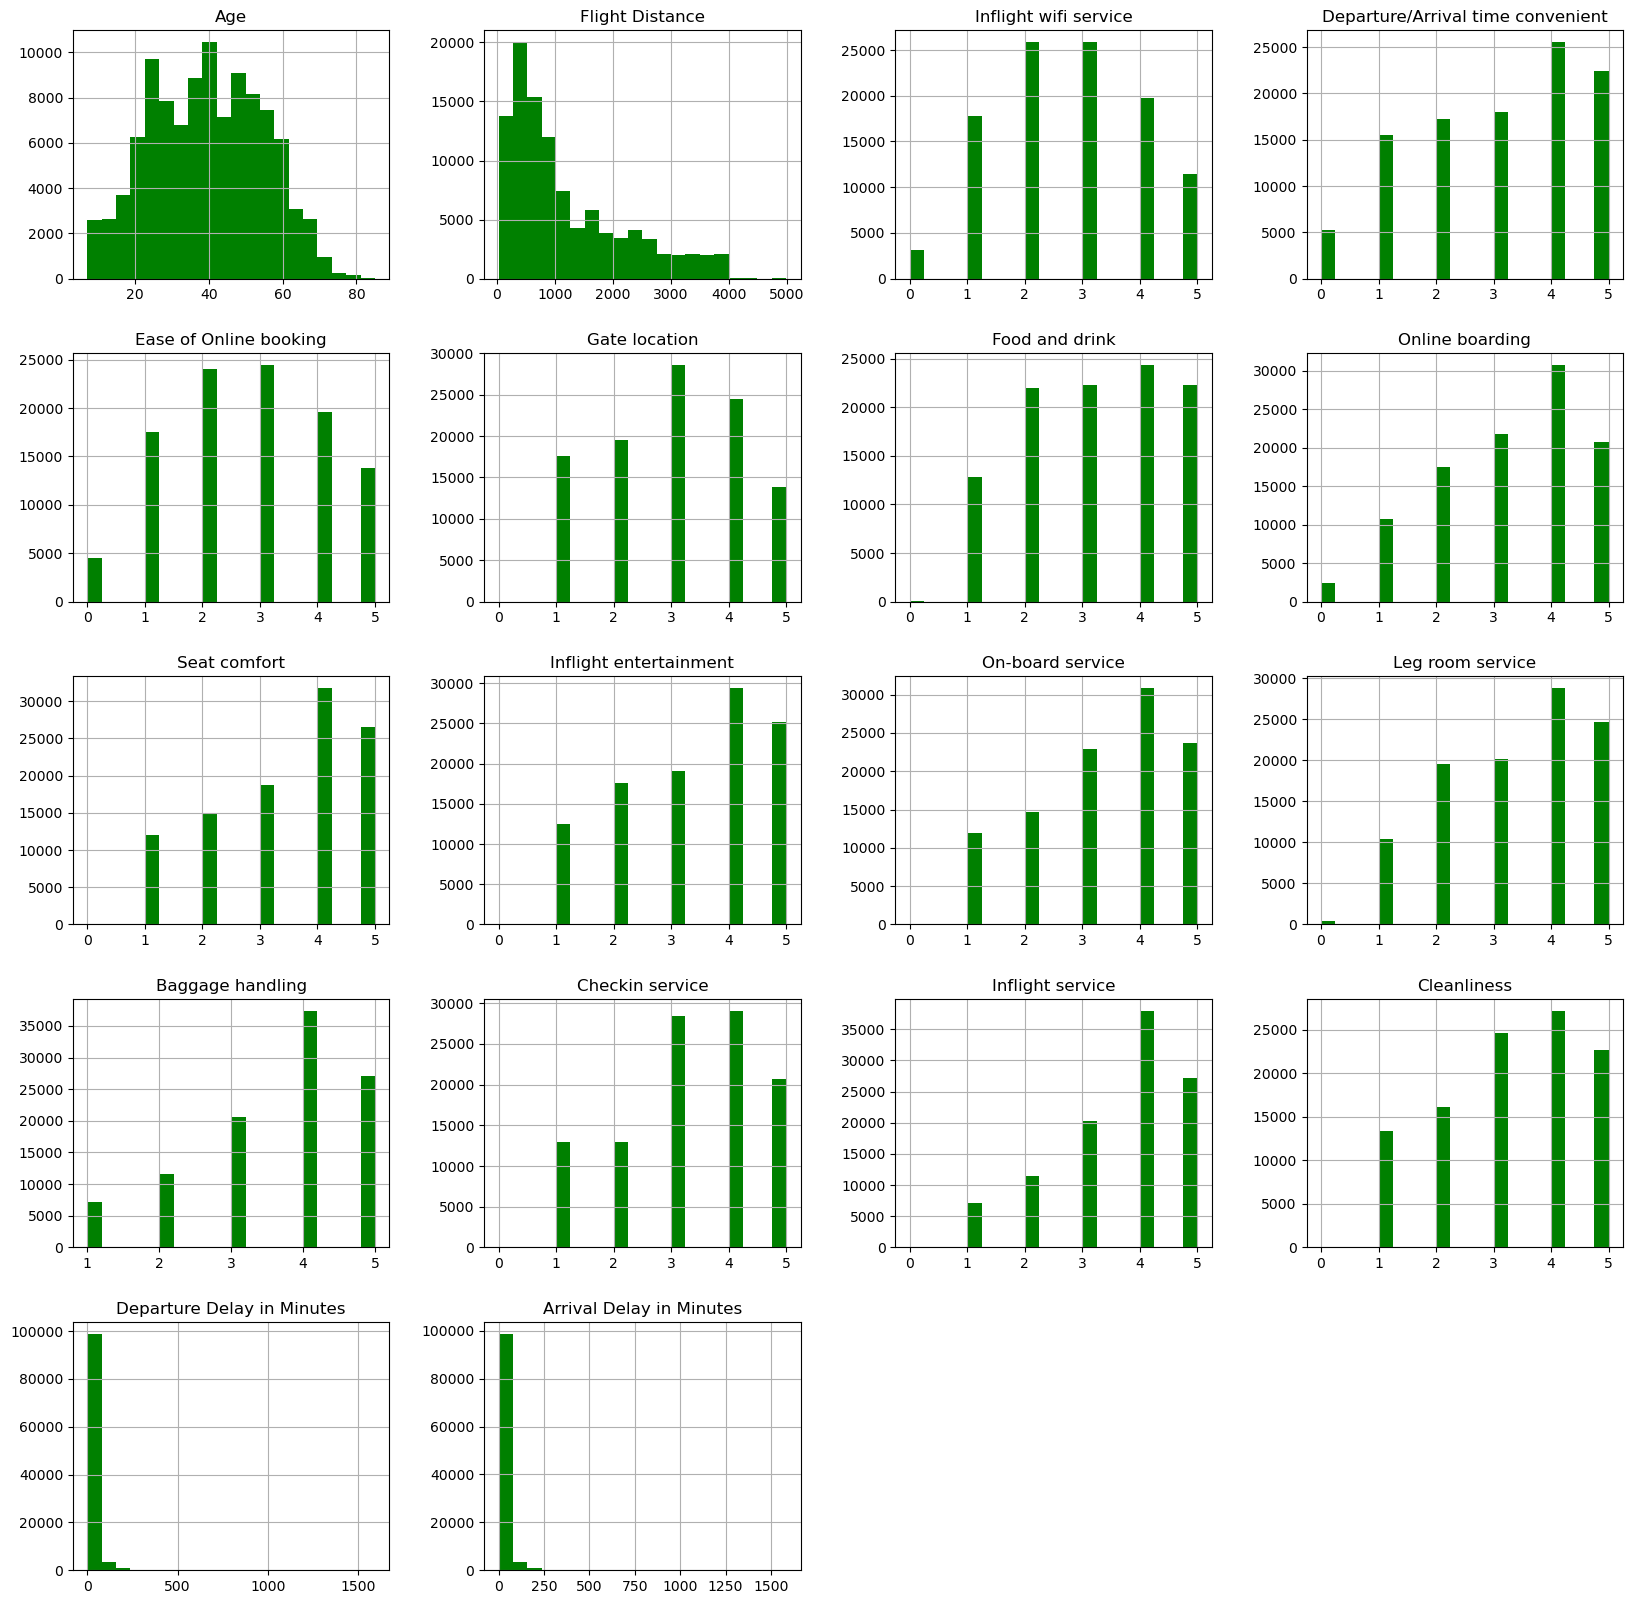

In [31]:
df_train.hist(bins=20,figsize=(20,20),color='green')
plt.show()

# Column Data Encoding

## Encoding Train Data

In [32]:
df_train.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [33]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
df_train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [35]:
df_train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [36]:
df_train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [37]:
df_train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

### Option 1 encode with LabelEncoder

In [38]:
label_encoder=LabelEncoder()
columns=df_train.select_dtypes(include='object').drop(columns='satisfaction').columns
for column in columns:
    df_train[column]=label_encoder.fit_transform(df_train[column])
df_train.head(9)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
111157,0,0,26,1,1,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
82113,1,0,47,1,1,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
96462,0,0,52,0,0,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
79485,0,0,41,0,0,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied


In [39]:
df_train.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

### Option 2 encode with replace

In [40]:
# df_train.replace(
#     {
#         'Gender':
#         {
#         'Male':1,
#         'Female':2
#         },
#         'Customer Type':
#             {
#             'Loyal Customer':1,
#             'disloyal Customer':2
#             },
        
#         'Type of Travel':
#             {
#             'Personal Travel':1,
#             'Business travel':2
#             },
#         'Class':
#         {
#             'Eco Plus':1,
#             'Business':2,
#             'Eco':3
#         }
        
#     },inplace=True
# )
# df_train.head(9)

In [41]:
df_train.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Encoding Test Data

In [42]:
df_test.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

### Use LabelEncoder

In [43]:
label_encoder=LabelEncoder()
columns=df_test.select_dtypes(include='object').drop(columns='satisfaction').columns
for column in columns:
    df_test[column]=label_encoder.fit_transform(df_test[column])
df_test.head(9)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
19556,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
90035,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
12360,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
36875,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
39177,1,0,16,0,1,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied
79433,0,0,77,0,0,3987,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.0,satisfied
97286,0,0,43,0,0,2556,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.0,satisfied
27508,1,0,47,0,1,556,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.0,satisfied


In [44]:
df_test.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

# Additional Charts

In [45]:
df_train.drop(columns='satisfaction').corr()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000395
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004891
Age,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012225
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,-0.224803,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005479
Class,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,-0.077042,-0.297062,-0.210158,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014860
Flight Distance,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002581
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019235
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000881
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.008098
Gate location,0.000333,0.006078,-0.001330,-0.030700,-0.004488,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005109


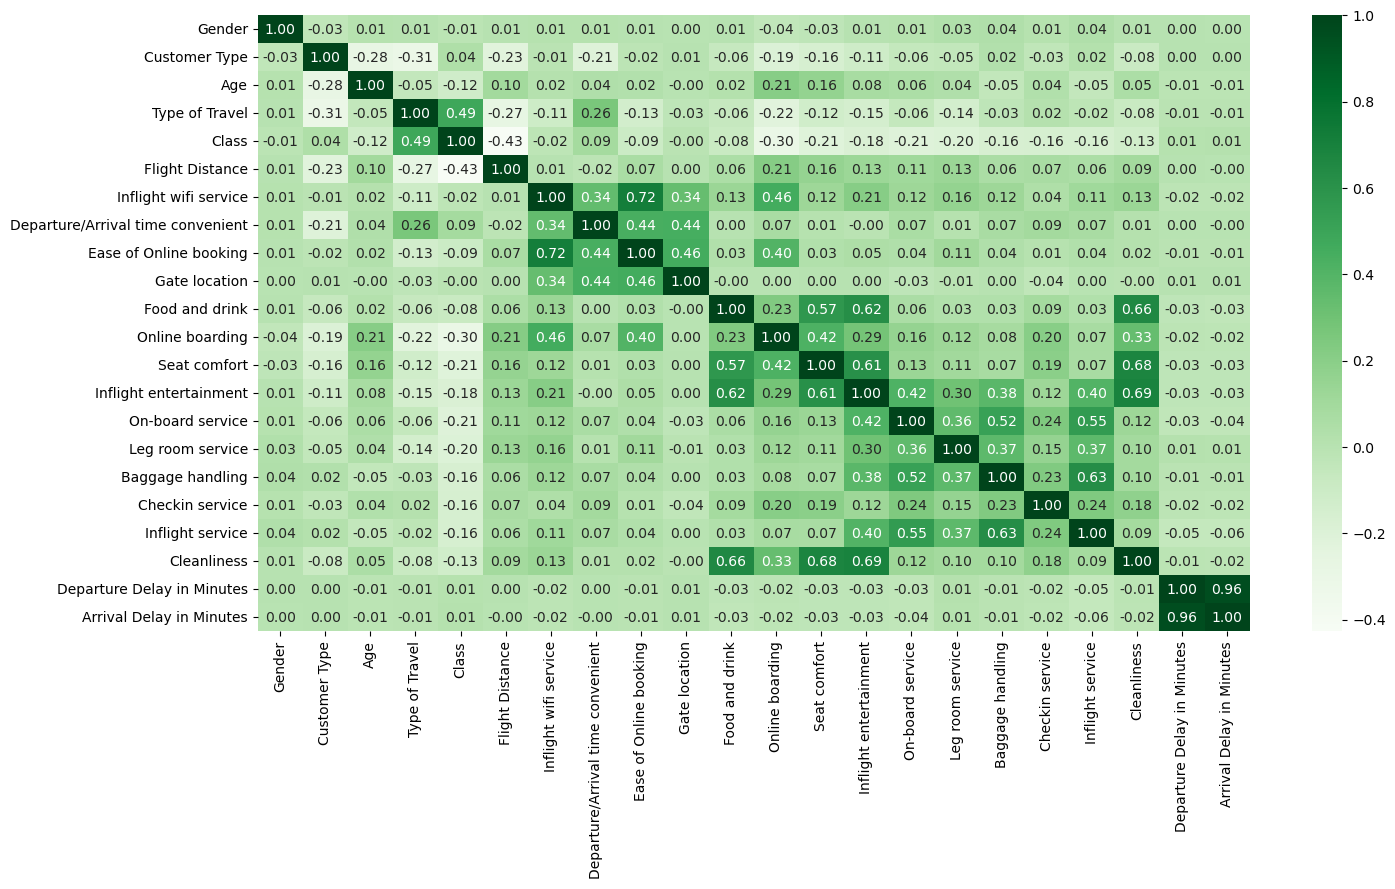

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(df_train.drop(columns='satisfaction').corr(),annot=True,fmt='.2f',cmap='Greens')
plt.show()

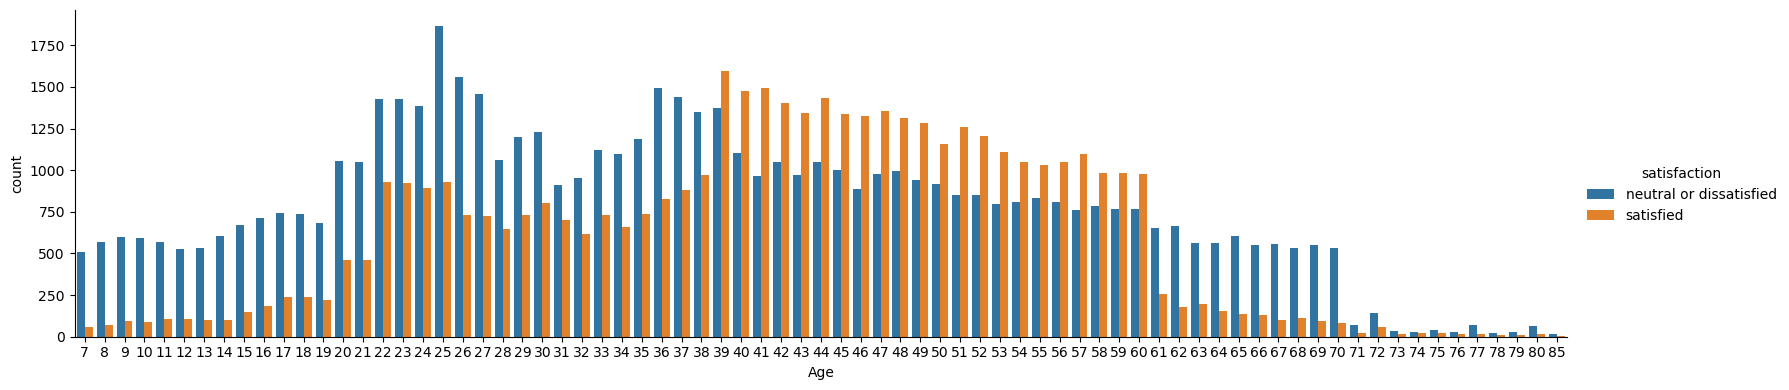

In [47]:
sns.catplot(data=df_train,x='Age',height=4,aspect=4,kind='count',hue='satisfaction')
plt.show()

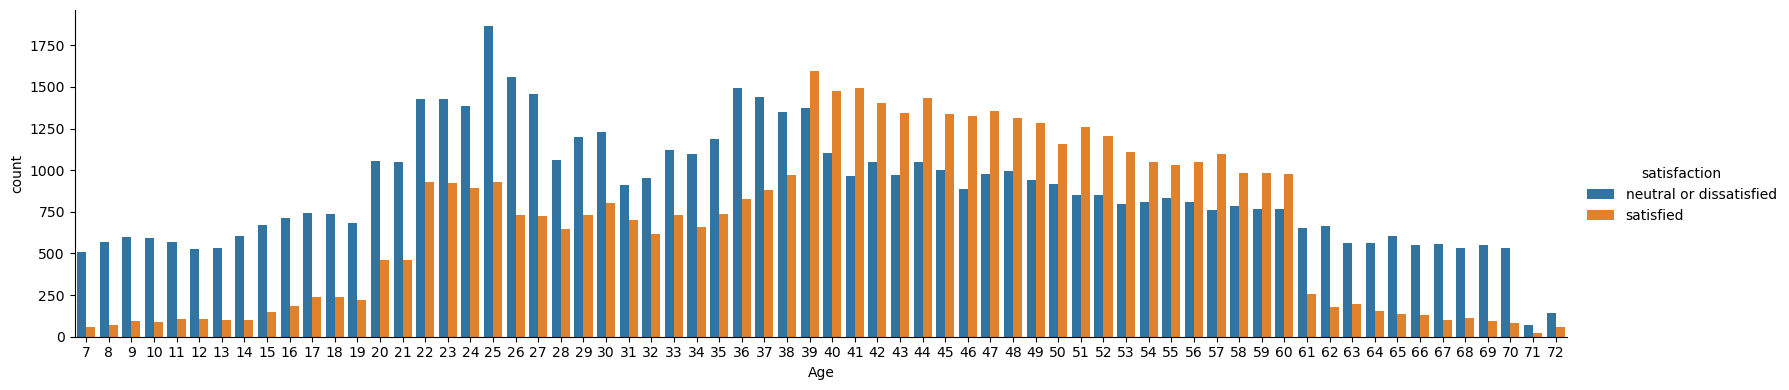

In [48]:
sns.catplot(data=df_train,x='Age',height=4,aspect=4,kind='count',hue='satisfaction',order=range(7,73))
plt.show()

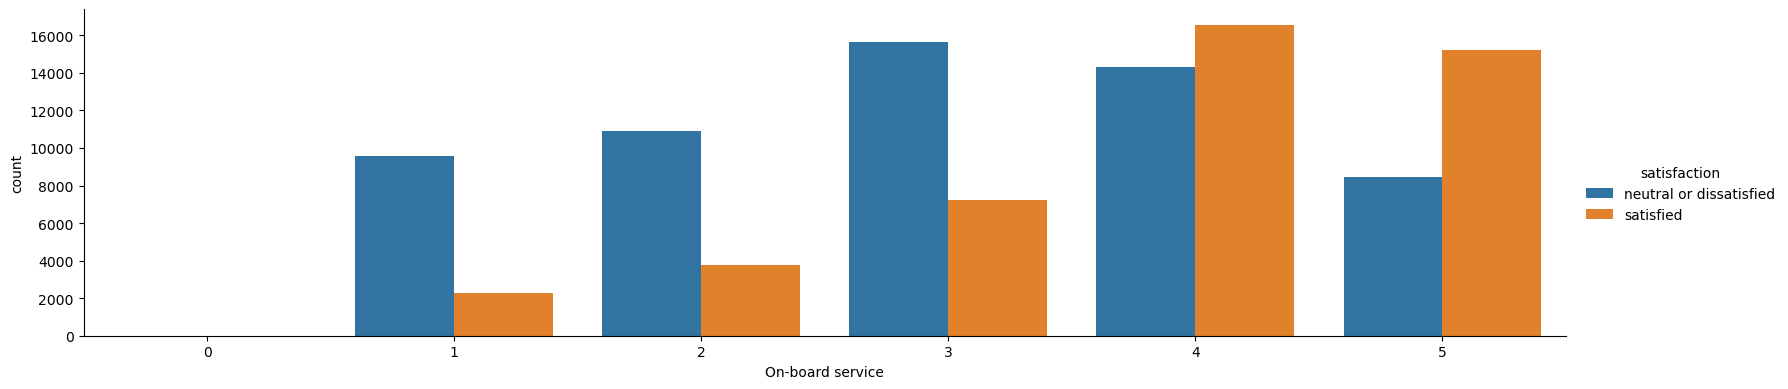

In [49]:
sns.catplot(data=df_train,x='On-board service',height=4,aspect=4,kind='count',hue='satisfaction')
plt.show()

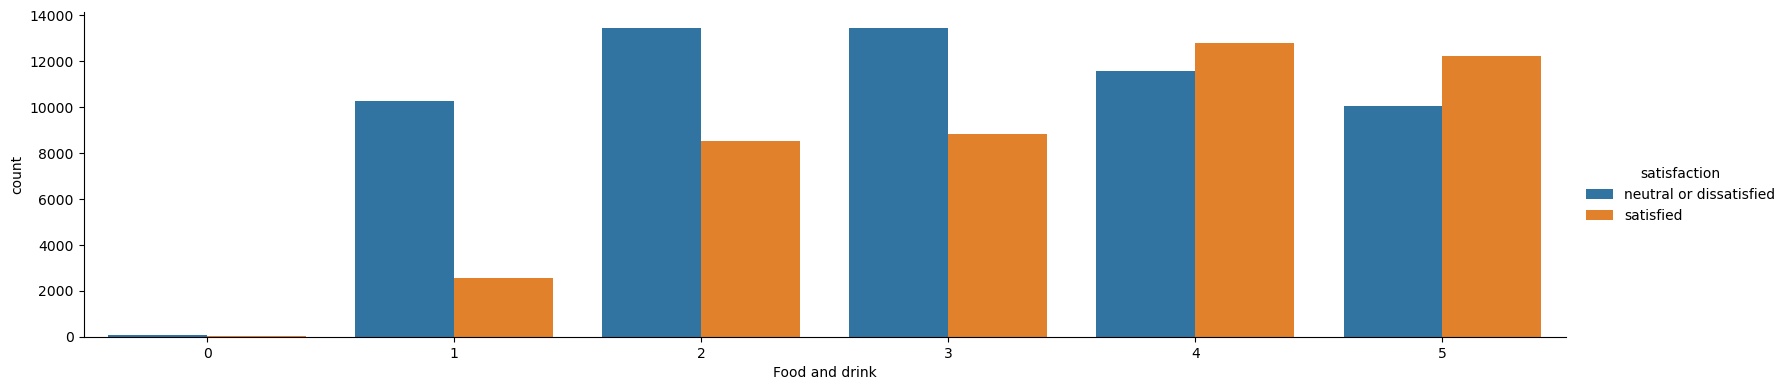

In [50]:
sns.catplot(data=df_train,x='Food and drink',height=4,aspect=4,kind='count',hue='satisfaction')
plt.show()

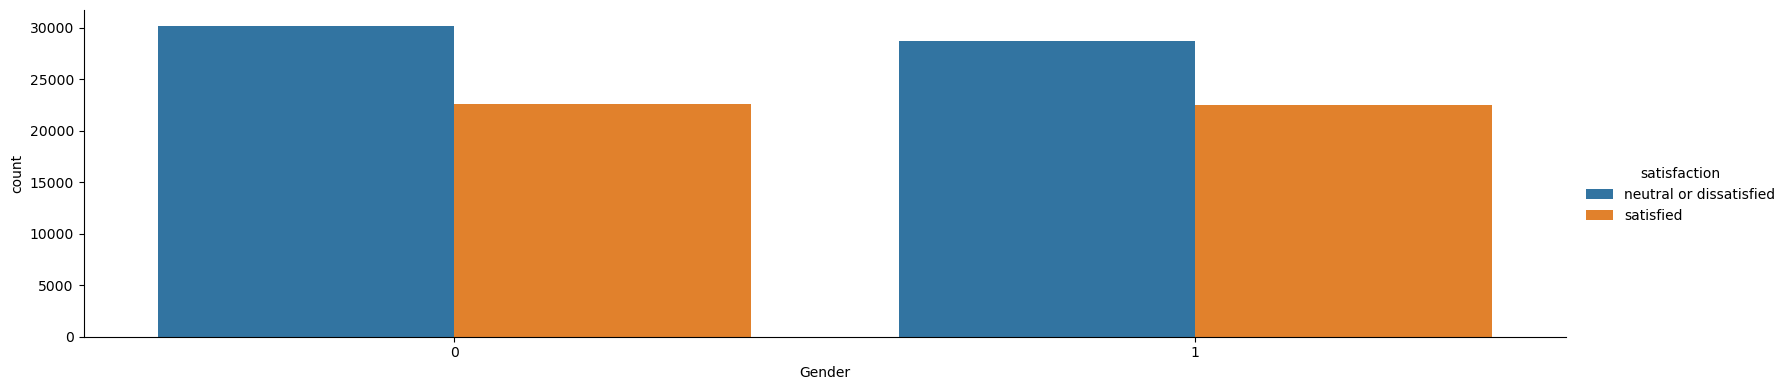

In [51]:
sns.catplot(data=df_train,x ='Gender',height=4,aspect=4,kind='count',hue='satisfaction')
plt.show()

## Filtering Data

In [52]:
df_train[['Gender','Age','Type of Travel']].head()

,Gender,Age,Type of Travel
id,,,
70172,1,13,1
5047,1,25,0
110028,0,26,0
24026,0,25,0
119299,1,61,0


In [53]:
df_train.loc[df_train['Age']>50,['Gender','Age','Flight Distance']].head()

,Gender,Age,Flight Distance
id,,,
119299,1,61,214
96462,0,52,2035
98628,1,53,834
114090,0,58,2139
102956,1,57,719


In [54]:
df_train.loc[df_train['Gender']==1,['Gender','Age','Flight Distance']].head()

,Gender,Age,Flight Distance
id,,,
70172,1,13,460
5047,1,25,235
119299,1,61,214
82113,1,47,1276
65725,1,20,1061


In [55]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [56]:
df_train.index

Int64Index([ 70172,   5047, 110028,  24026, 119299, 111157,  82113,  96462,
             79485,  65725,
            ...
             86549,  66030,  71445, 102203,  60666,  94171,  73097,  68825,
             54173,  62567],
           dtype='int64', name='id', length=103904)

# Models

In [57]:
X_train=df_train.drop(columns='satisfaction')
X_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,
70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0


In [58]:
y_train=df_train['satisfaction']
y_train.head(3)

id
70172     neutral or dissatisfied
5047      neutral or dissatisfied
110028                  satisfied
Name: satisfaction, dtype: object

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
X_test=df_test.drop(columns='satisfaction')
X_test.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,
19556,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
90035,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
12360,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0


In [62]:
y_test=df_test['satisfaction']
y_test.head(3)

id
19556                  satisfied
90035                  satisfied
12360    neutral or dissatisfied
Name: satisfaction, dtype: object

In [63]:
X_train.shape

(103904, 22)

In [64]:
X_test.shape

(25976, 22)

In [65]:
y_train.shape

(103904,)

In [66]:
y_test.shape

(25976,)

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
predictions=model.predict(X_test)
predictions

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [69]:
len(predictions)

25976

In [70]:
model_score=accuracy_score(predictions,y_test)
model_score

0.9473360024638128

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

0.9632352941176471

## KNeighborsClassifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

C:\Users\satun\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7455343393902063

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

0.8708038189097629

# Prediction without Voting columns

In [76]:
X_train=X_train[['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,
70172,1,0,13,1,2,460,25,18.0
5047,1,1,25,0,0,235,1,6.0
110028,0,0,26,0,0,1142,0,0.0
24026,0,0,25,0,0,562,11,9.0
119299,1,0,61,0,0,214,0,0.0


In [77]:
X_test=X_test[['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
X_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,
19556,0,0,52,0,1,160,50,44.0
90035,0,0,36,0,0,2863,0,0.0
12360,1,1,20,0,1,192,0,0.0
77959,1,0,44,0,0,3377,0,6.0
36875,0,0,49,0,1,1182,0,20.0


## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
from sklearn.metrics import accuracy_score
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

0.7097320603634124

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

0.7632044964582692

## KNeighborsClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

C:\Users\satun\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6606867878041269

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
model_score=accuracy_score(predictions,y_test)
model_score

0.7769479519556514

## Testing the model on hand-generated data

In [85]:
X_train.iloc[:0].to_dict()

{'Gender': {},
 'Customer Type': {},
 'Age': {},
 'Type of Travel': {},
 'Class': {},
 'Flight Distance': {},
 'Departure Delay in Minutes': {},
 'Arrival Delay in Minutes': {}}

In [118]:
test_inputs={
 'Gender': [1,0,1],
 'Customer Type': [0,1,0],
 'Age': [25,20,18],
 'Type of Travel': [1,0,0],
 'Class': [0,1,1],
 'Flight Distance': [1000,1800,800],
 'Departure Delay in Minutes': [0,10,0],
 'Arrival Delay in Minutes': [0,2,0]
}
test_df=pd.DataFrame(test_inputs)
test_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,25,1,0,1000,0,0
1,0,1,20,0,1,1800,10,2
2,1,0,18,0,1,800,0,0


In [119]:
### This model is Logistic Regression¶
model.predict(test_df)

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied'],
      dtype=object)

## Saving Prediction Model (Logistic Regression)

In [120]:
import joblib
joblib.dump(model,'airline_passenger_satisfaction_without_voit.joblib')

['airline_passenger_satisfaction_without_voit.joblib']

In [121]:
trained_model=joblib.load('airline_passenger_satisfaction_without_voit.joblib')
trained_model.predict(test_df)

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied'],
      dtype=object)